In [1]:
import numpy as np
import os

import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import itertools
import astropy.units as u
import astropy.constants as const
import scipy.stats


In [2]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *
from FT_0206 import *
from plot_binned_detection_1d2d_0521 import *

ModuleNotFoundError: No module named 'plot_binned_detection_1d2d_0521'

In [3]:

folder_2d = 'nestpy_unbinned_unbound'
nuclei_2d = 'Xenon'
footnote = 'thrd'
E_threshold_keV = 1

In [4]:
#pcles_alter = ['atmNu_SURF_avg', 'dsnb', 'hep', '8B', 'pp', 'Be7_384', 'Be7_861', 'CNO','pep', 'nubb']
pcles_null = ['atmNu_SURF_avg', 'dsnb', '8B', 'pp', 'Be7_384', 'Be7_861', 'CNO','pep',  'nubb']#
pcles_null_woatm = ['dsnb', '8B', 'pp', 'Be7_384', 'Be7_861', 'CNO','pep',  'nubb']#
pcles_null_wo8B = ['dsnb', 'atmNu_SURF_avg', 'pp', 'Be7_384', 'Be7_861', 'CNO','pep',  'nubb']#
pcles_null_8B = ['8B']#
pcles_det = ['hep' ]
#pcles_null_wopp = ['dsnb', 'hep', '8B', 'Be7_384', 'Be7_861', 'CNO', 'pep', 'nubb']

In [26]:
xbins_all = np.linspace(1, 25, 11)
ybins_all = np.linspace(1.9, 4, 11)
xbins_all, ybins_all

(array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 array([1.9 , 2.11, 2.32, 2.53, 2.74, 2.95, 3.16, 3.37, 3.58, 3.79, 4.  ]))

In [27]:
folder_2d = 'nestpy_unbinned_unbound'
nuclei_2d = 'Xenon'
footnote = 'thrd'
E_threshold_keV = 1
metallicity = 'high'
pcle = pcles_det[0]
file_name = os.path.join(folder_2d, 'S1S2_'+pcle+'.csv')
print(file_name, os.path.exists(file_name))

dataf = pd.read_csv(file_name)

valid_dataf = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]

s1 = valid_dataf['cS1[phd]']
log10s2 = np.log10(valid_dataf['cS2[phd]'])
eff_num =len(dataf)


eventR, _, _, _, _, _ = read_pcle_cdf(pcle, nuclei_2d, E_threshold_keV, '', recoil_type = '',
              read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                                      metallicity = metallicity, ebind = True, plot_pdf = False, corr = '')
DT_longtime = eff_num/eventR
counts_all,_, _= np.histogram2d(s1, log10s2, bins =[xbins_all, ybins_all])
rates = counts_all/DT_longtime
print(eventR)

nestpy_unbinned_unbound/S1S2_hep.csv True
NR
else
 ./real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
0.8275325590356176 1 / (t yr)


In [28]:
min(s1), min(log10s2), max(s1), max(log10s2)

(1.0087542973813943, 1.9395757508924332, 22.69990282719251, 3.8019453711012856)

In [29]:
rates_null = np.zeros(rates.shape)*rates.unit
rates_null

<Quantity [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]] 1 / (t yr)>

In [30]:
for pcle in pcles_null_wo8B:
    file_name = os.path.join(folder_2d, 'S1S2_'+pcle+'.csv')
    print(file_name, os.path.exists(file_name))

    dataf = pd.read_csv(file_name)

    valid_dataf = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]

    s1 = valid_dataf['cS1[phd]']
    log10s2 = np.log10(valid_dataf['cS2[phd]'])
    eff_num =len(dataf)


    eventR, _, _, _, _, _ = read_pcle_cdf(pcle, nuclei_2d, E_threshold_keV, '', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                                          metallicity = metallicity, ebind = True, plot_pdf = False, corr = '')
    DT_longtime = eff_num/eventR
   

        
    counts,xbins, ybins = np.histogram2d(s1, log10s2, bins =[xbins_all, ybins_all])

    print('number within binrange region = ', int(sum(sum(counts))),
          'fraction of counts within binrange region = ', int(sum(sum(counts)))/len(valid_dataf),
          'samebin? ', all(xbins == xbins_all), all(ybins == ybins_all)
         )
    
    r = counts/DT_longtime
    rates_null+=r
    

nestpy_unbinned_unbound/S1S2_dsnb.csv True
NR
survival
number within binrange region =  4797262 fraction of counts within binrange region =  0.9071854543584127 samebin?  True True
nestpy_unbinned_unbound/S1S2_atmNu_SURF_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
survival
number within binrange region =  3678885 fraction of counts within binrange region =  0.4577504526321723 samebin?  True True
nestpy_unbinned_unbound/S1S2_pp.csv True
ER
else
 ./real_data_nest/pdf/pp_ER_Ebind_Xenon_pdf_high.txt
survival
number within binrange region =  53813 fraction of counts within binrange region =  0.00611629797406225 samebin?  True True
nestpy_unbinned_unbound/S1S2_Be7_384.csv True
ER
else
 ./real_data_nest/pdf/Be7_384_ER_Ebind_Xenon_pdf_high.txt
survival
number within binrange region =  32360 fraction of counts within binrange region =  0.0036758700486791518 samebin?  True True
nestpy_unbinned_unbound/S1S2_Be7_861.csv True
ER
else
 ./real_data_nest/pdf/Be7_861_ER_Ebind_X

In [31]:
xbins_centers = (xbins_all[1:]+xbins_all[:-1])/2
xbins_boundary = [[xbins_all[i], xbins_all[i+1]] for i in range(0, len(xbins_all)-1)]

ybins_centers = (ybins_all[1:]+ybins_all[:-1])/2
ybins_boundary = [[ybins_all[i], ybins_all[i+1]] for i in range(0, len(ybins_all)-1)]
len(xbins_centers), len(ybins_centers)

(10, 10)

In [32]:
rates_null

<Quantity [[1.98602819e-06, 2.04875008e-06, 1.24350816e-05,
            6.34048356e-05, 2.59073297e-04, 8.51529866e-04,
            1.43808788e-03, 9.43225713e-04, 1.98401793e-02,
            1.89087889e-01],
           [1.54385396e-06, 1.49065781e-06, 9.54064840e-06,
            5.07677964e-05, 2.35003004e-04, 9.72629279e-04,
            2.46411104e-03, 2.62840228e-03, 3.33932579e-02,
            4.61797353e-01],
           [7.94008464e-08, 1.08108075e-07, 7.28593857e-07,
            4.78089393e-06, 2.91896850e-05, 2.12821053e-04,
            1.11723500e-03, 2.43065719e-03, 1.24509732e-02,
            4.24022372e-01],
           [1.93196727e-09, 5.79590182e-09, 3.52378797e-08,
            2.98283713e-07, 3.10229073e-06, 3.93215786e-05,
            4.12703081e-04, 1.75664792e-03, 4.70228581e-03,
            3.33178299e-01],
           [0.00000000e+00, 1.93196727e-09, 1.93196727e-09,
            5.54824899e-08, 2.73168138e-07, 7.35427993e-06,
            1.41619334e-04, 1.11070400e-03, 

In [33]:
ratio = rates/rates_null
ratio[np.isnan(ratio)] = 0
ratio[ratio == -np.inf] = 0
ratio[ratio == np.inf] = 0
ratio

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity [[5.86681422e+01, 6.15979063e+01, 5.94874549e+01,
            5.53660590e+01, 4.96839025e+01, 3.77828493e+01,
            2.20241409e+01, 8.11928387e+00, 9.28463121e-03,
            0.00000000e+00],
           [5.39233487e+01, 5.64583371e+01, 5.45752725e+01,
            5.13118537e+01, 4.44006038e+01, 3.22359577e+01,
            1.70916058e+01, 5.44683699e+00, 1.41031097e-02,
            0.00000000e+00],
           [7.08710506e+01, 4.66935390e+01, 4.46367057e+01,
            4.00880136e+01, 3.42526765e+01, 2.27210651e+01,
            1.05295257e+01, 2.81257761e+00, 2.70306173e-02,
            3.90324951e-07],
           [4.28336738e+01, 1.42778913e+01, 4.22715164e+01,
            3.46789199e+01, 2.27003292e+01, 1.45022836e+01,
            5.93244379e+00, 1.28531153e+00, 3.28388324e-02,
            0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 4.28336738e+01,
            4.47456068e+00, 1.66616396e+01, 8.02295697e+00,
            3.05198622e+00, 5.35543587e-01, 

In [34]:
good = ratio>1
ratio[good]

<Quantity [58.66814222, 61.59790629, 59.48745488, 55.36605901, 49.6839025 ,
           37.78284928, 22.02414092,  8.11928387, 53.92334866, 56.45833711,
           54.57527251, 51.31185374, 44.40060382, 32.23595774, 17.09160581,
            5.44683699, 70.87105057, 46.69353895, 44.63670568, 40.08801356,
           34.25267646, 22.72106514, 10.52952568,  2.81257761, 42.83367376,
           14.27789125, 42.27151636, 34.6789199 , 22.70032917, 14.50228364,
            5.93244379,  1.28531153, 42.83367376,  4.47456068, 16.66163961,
            8.02295697,  3.05198622,  5.8881053 ,  3.91379008,  1.38569286,
            1.56908854,  5.19865437]>

In [35]:
xbins_good, ybins_good = np.where(good == True)
xbins_good, ybins_good

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 6, 7]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
        6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 4, 5, 6, 5, 5]))

In [36]:
bins_groups = []

In [37]:
for x_bin_index in set(xbins_good):
    per_good = xbins_good == x_bin_index
    min_x_bin, max_x_bin = min(xbins_boundary[x_bin_index]), max(xbins_boundary[x_bin_index])
    
    min_y_bin_index, max_y_bin_index = min(ybins_good[per_good]), max(ybins_good[per_good]) 
    min_y_bin, max_y_bin = min(ybins_boundary[min_y_bin_index]), max(ybins_boundary[max_y_bin_index])
    print(x_bin_index, min_x_bin, max_x_bin, min_y_bin_index, max_y_bin_index ,min_y_bin, max_y_bin)
    bin_group = (min_x_bin, max_x_bin, min_y_bin, max_y_bin, 1, 1)
    bins_groups.append(bin_group)

0 1.0 3.4 0 7 1.9 3.58
1 3.4 5.8 0 7 1.9 3.58
2 5.8 8.2 0 7 1.9 3.58
3 8.2 10.6 0 7 1.9 3.58
4 10.6 13.0 2 6 2.32 3.37
5 13.0 15.399999999999999 4 6 2.74 3.37
6 15.399999999999999 17.8 5 5 2.95 3.16
7 17.8 20.2 5 5 2.95 3.16


tot_binnums =  8
nestpy_unbinned_unbound/S1S2_hep.csv True
NR
else
 ./real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
sim number =  10000000 
valid_dataf =  2694258
number within binrange region =  1073902 
xbins =  [1.  3.4] 
ybins =  [1.9  3.58] 
rates =  [0.08886889] 1 / (t yr) 
fraction of rate within binrange =  0.10739019999999999
number within binrange region =  1226696 
xbins =  [3.4 5.8] 
ybins =  [1.9  3.58] 
rates =  [0.10151309] 1 / (t yr) 
fraction of rate within binrange =  0.12266959999999999
number within binrange region =  298122 
xbins =  [5.8 8.2] 
ybins =  [1.9  3.58] 
rates =  [0.02467057] 1 / (t yr) 
fraction of rate within binrange =  0.029812199999999997
number within binrange region =  64757 
xbins =  [ 8.2 10.6] 
ybins =  [1.9  3.58] 
rates =  [0.00535885] 1 / (t yr) 
fraction of rate within binrange =  0.0064757
number within binrange region =  5995 
xbins =  [10.6 13. ] 
ybins =  [2.32 3.37] 
rates =  [0.00049611] 1 / (t yr) 
fraction of rate within bi

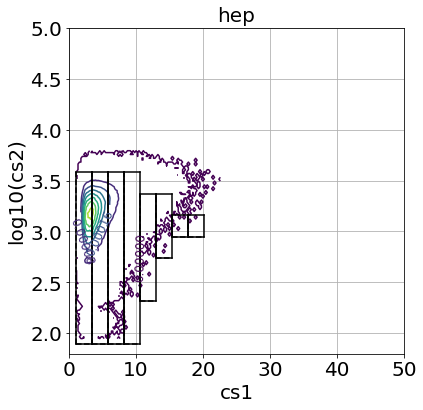

In [52]:
_, sim_rate_det = get_poisrdm_Rate(pcles_det, bins_groups,
                                               N = 1, 
                     nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = 1, metallicity = 'high',
                     folder_2d = 'nestpy_unbinned_unbound',plot = True, print_check = True, 
                                               plot_xlims = [0, 50], plot_ylims = [1.8, 5])

In [39]:
sim_rate_det

<Quantity [8.88688870e-02, 1.01513088e-01, 2.46705662e-02, 5.35885259e-03,
           4.96105769e-04, 6.90989687e-05, 4.13766280e-07, 1.65506512e-07] 1 / (t yr)>

In [40]:
homogeneous = sim_rate_det>1e-4*sim_rate_det.unit
bin_terminate_idc = max(np.where(homogeneous)[0])+1
sim_rate_det[:bin_terminate_idc], len(sim_rate_det[:bin_terminate_idc])
bins_groups_homo = bins_groups[:bin_terminate_idc]
bins_groups_homo

[(1.0, 3.4, 1.9, 3.58, 1, 1),
 (3.4, 5.8, 1.9, 3.58, 1, 1),
 (5.8, 8.2, 1.9, 3.58, 1, 1),
 (8.2, 10.6, 1.9, 3.58, 1, 1),
 (10.6, 13.0, 2.32, 3.37, 1, 1)]

tot_binnums =  5
nestpy_unbinned_unbound/S1S2_atmNu_SURF_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
survival
sim number =  10000000 
valid_dataf =  8036879
number within binrange region =  272801 
xbins =  [1.  3.4] 
ybins =  [1.9  3.58] 
rates =  [0.00190773] 1 / (t yr) 
fraction of rate within binrange =  0.0272801
number within binrange region =  530447 
xbins =  [3.4 5.8] 
ybins =  [1.9  3.58] 
rates =  [0.00370948] 1 / (t yr) 
fraction of rate within binrange =  0.05304470000000001
number within binrange region =  358681 
xbins =  [5.8 8.2] 
ybins =  [1.9  3.58] 
rates =  [0.0025083] 1 / (t yr) 
fraction of rate within binrange =  0.03586810000000001
number within binrange region =  225991 
xbins =  [ 8.2 10.6] 
ybins =  [1.9  3.58] 
rates =  [0.00158038] 1 / (t yr) 
fraction of rate within binrange =  0.0225991
number within binrange region =  14725 
xbins =  [10.6 13. ] 
ybins =  [2.32 3.37] 
rates =  [0.00010297] 1 / (t yr) 
fraction of rate within bi

ER
survival
sim number =  10000000 
valid_dataf =  8806583
number within binrange region =  0 
xbins =  [1.  3.4] 
ybins =  [1.9  3.58] 
rates =  [0.] 1 / (t yr) 
fraction of rate within binrange =  0.0
number within binrange region =  0 
xbins =  [3.4 5.8] 
ybins =  [1.9  3.58] 
rates =  [0.] 1 / (t yr) 
fraction of rate within binrange =  0.0
number within binrange region =  0 
xbins =  [5.8 8.2] 
ybins =  [1.9  3.58] 
rates =  [0.] 1 / (t yr) 
fraction of rate within binrange =  0.0
number within binrange region =  0 
xbins =  [ 8.2 10.6] 
ybins =  [1.9  3.58] 
rates =  [0.] 1 / (t yr) 
fraction of rate within binrange =  0.0
number within binrange region =  0 
xbins =  [10.6 13. ] 
ybins =  [2.32 3.37] 
rates =  [0.] 1 / (t yr) 
fraction of rate within binrange =  0.0
fraction of rate within tot bin range =  0.0 
rate within tot bin range =  0.0 1 / (t yr)


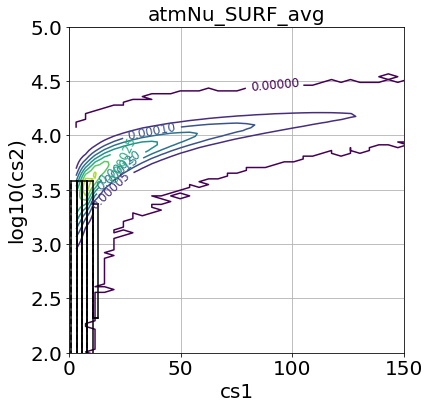

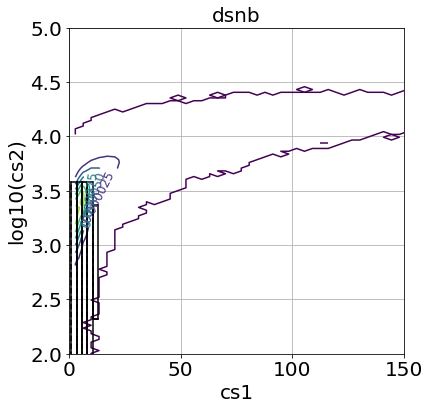

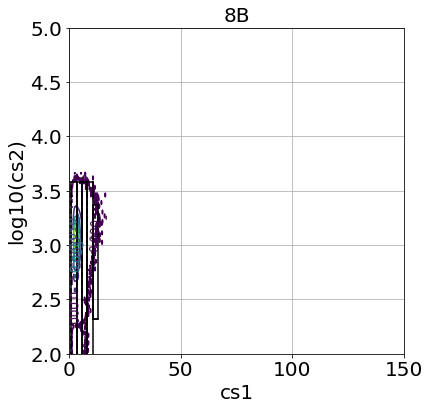

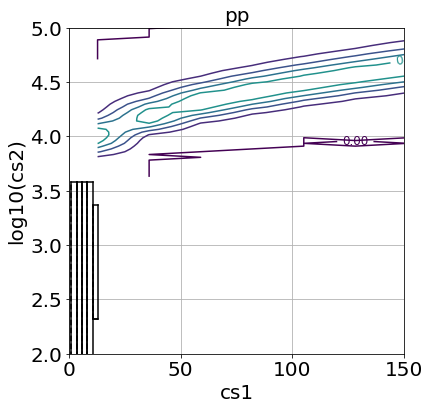

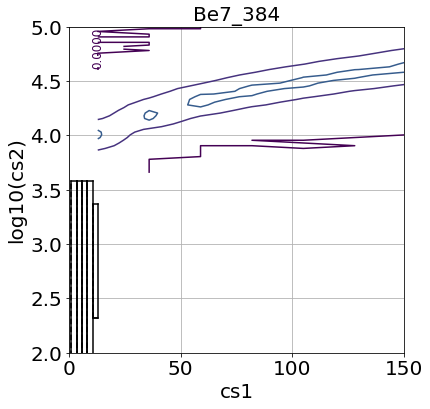

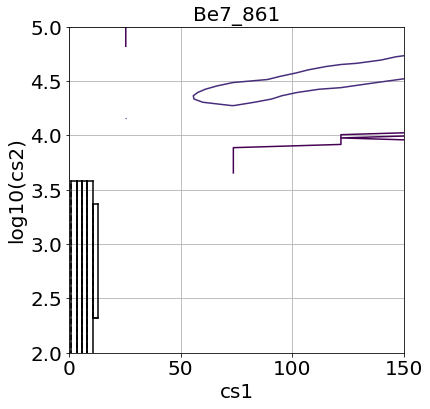

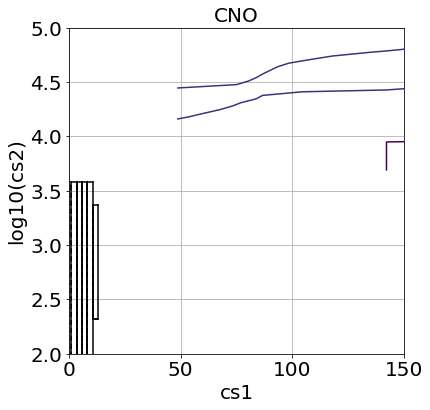

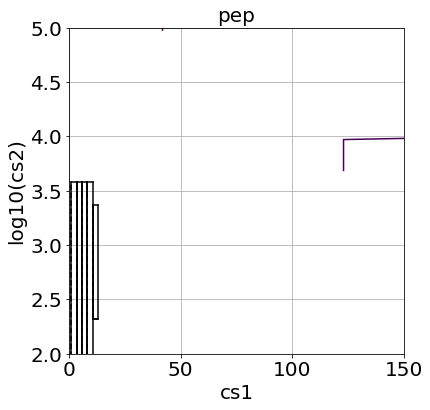

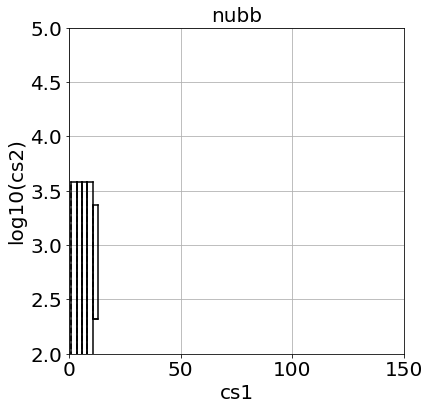

In [41]:
_, sim_rate_null = get_poisrdm_Rate(pcles_null, bins_groups_homo,
                                               N = 1, 
                     nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = 1, metallicity = 'high',
                     folder_2d = 'nestpy_unbinned_unbound',plot = True, print_check = True, 
                                               plot_xlims = [0, 150], plot_ylims = [2, 5])

In [42]:
sim_rate_null

<Quantity [7.59440075e+00, 6.33738894e+00, 6.72046078e-01, 5.49349794e-02,
           3.14853787e-03] 1 / (t yr)>

In [48]:
good2 = sim_rate_null<1*sim_rate_null.unit


In [49]:
null_sum_ijkappa = sum(sim_rate_null).value
alter_sum_ijkappa = sum(sim_rate_null+ sim_rate_det[homogeneous]).value
null_sum_ijkappa,alter_sum_ijkappa

(0.7301295949198483, 0.7606551194380188)

sumnull2d =  0.7301295949198483 sumalter2d =  0.7606551194380188 
DT =  1000 E_N_null =  730.1295949198483 E_N_alter =  760.6551194380188 
 E_N_alter - E_N_null =  30.525524518170528 
 N_alpha =  810.2752267417897  1-beta =  0.9775007443772874 G =  2.966059649765244 


sumnull2d =  0.7301295949198483 sumalter2d =  0.7606551194380188 
DT =  1258 E_N_null =  918.5030304091691 E_N_alter =  956.9041402530277 
 E_N_alter - E_N_null =  38.401109843858535 
 N_alpha =  1007.2979015081362  1-beta =  0.9656000799935206 G =  2.9298648288295954 


sumnull2d =  0.7301295949198483 sumalter2d =  0.7606551194380188 
DT =  1584 E_N_null =  1156.5252783530398 E_N_alter =  1204.8777091898216 
 E_N_alter - E_N_null =  48.35243083678188 
 N_alpha =  1256.9835202486204  1-beta =  0.956845806247913 G =  2.953983114939526 


sumnull2d =  0.7301295949198483 sumalter2d =  0.7606551194380188 
DT =  1995 E_N_null =  1456.6085418650973 E_N_alter =  1517.5069632788475 
 E_N_alter - E_N_null =  60.89842141375016 
 N

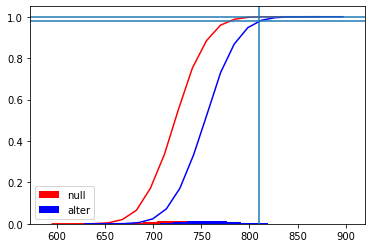

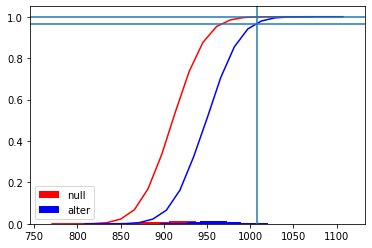

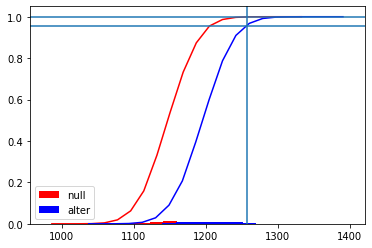

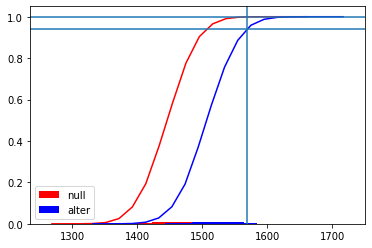

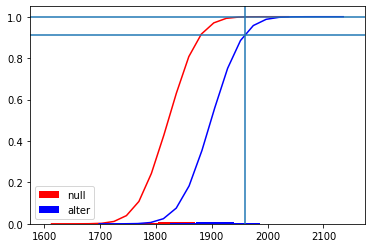

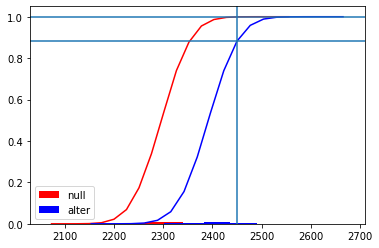

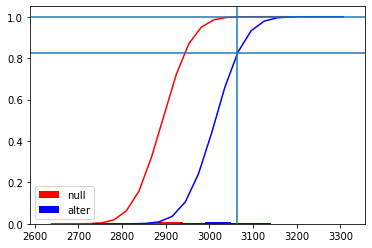

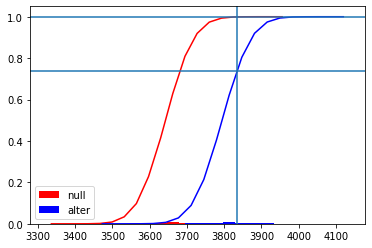

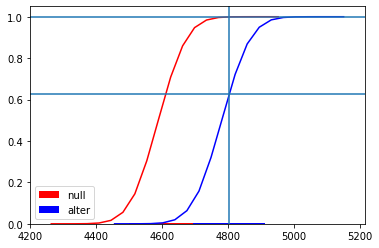

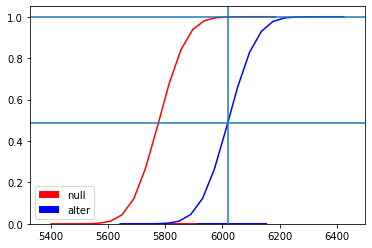

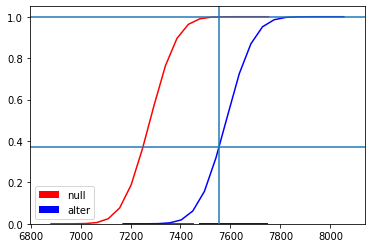

In [50]:
alpha = 0.001
beta = 0.9
exposures = [int(i) for i in np.logspace(np.log10(1e3), np.log10(1e4), 11)]
DT_all,_,_,_ = get_DT_alphabeta_G_method2(exposures, null_sum_ijkappa, alter_sum_ijkappa, alpha, beta, 
                     simnum = 10000000, binnum = 20, 
                     plot= True, print_check = True)

In [51]:
DT_all

-1

nestpy_unbinned_unbound/S1S2_atmNu_CJPL_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_CJPL_avg_NR_Xenon_pdf.txt
survival
nestpy_unbinned_unbound/S1S2_atmNu_Kamioka_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_Kamioka_avg_NR_Xenon_pdf.txt
survival
nestpy_unbinned_unbound/S1S2_atmNu_LNGS_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_LNGS_avg_NR_Xenon_pdf.txt
survival
nestpy_unbinned_unbound/S1S2_atmNu_SURF_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
survival
nestpy_unbinned_unbound/S1S2_atmNu_SNOlab_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_SNOlab_avg_NR_Xenon_pdf.txt
survival
alpha =  0.001 beta =  0.8 DTs(loc) =  [array(2042.71002707), array(1507.43138102), array(1080.09016093), array(581.71070201), array(632.3665739)]
nestpy_unbinned_unbound/S1S2_atmNu_CJPL_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_CJPL_avg_NR_Xenon_pdf.txt
survival
nestpy_unbinned_unbound/S1S2_atmNu_Kamioka_avg.csv True
NR
 ./real_data_nest/pdf/atmNu_Kamioka_avg_NR_Xenon_pdf.txt
survival
nest

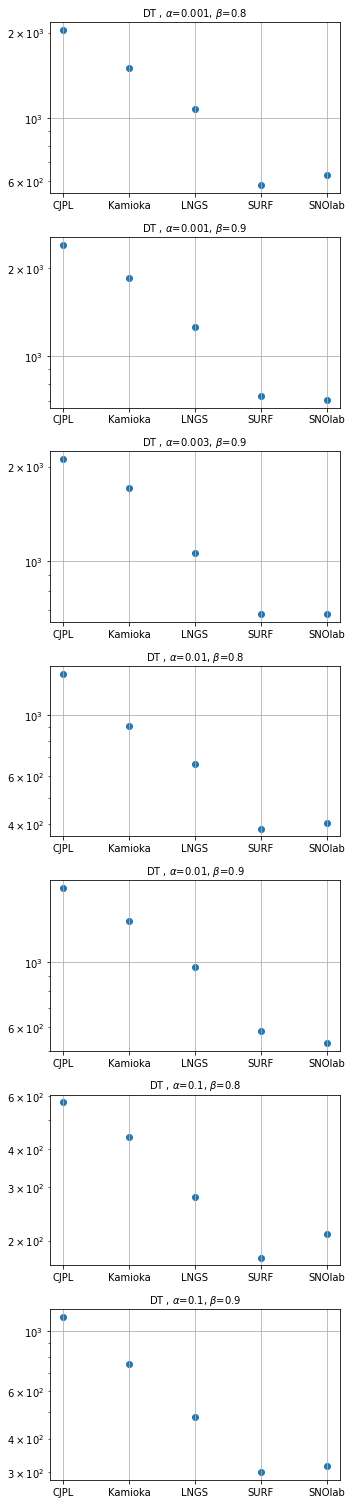

In [43]:
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']
x = [1,2,3,4,5]
exposures = [int(i) for i in np.logspace(np.log10(100), np.log10(2500), 26)]
alphas_betas = [(0.001, 0.8), (0.001, 0.9),(0.003, 0.9),  (0.01, 0.8), (0.01, 0.9), (0.1, 0.8), (0.1, 0.9)]
fig, ax = plt.subplots(len(alphas_betas), 1, figsize = (5, 3*len(alphas_betas)))

for ab, alpha_beta, in enumerate(alphas_betas):
    alpha, beta = alpha_beta
    Z_alpha = round(stats.norm.ppf(alpha), 3)
    Phi_minus1 = round(stats.norm.ppf(beta), 3)
    ax[ab] = setup_cdfpdf_ax(ax[ab], 'DT ' + r', $\alpha$='+str(alpha)+r', $\beta$='+str(beta), 
                        '', '', True, '', 10,10, vlines = [0], hlines = [0],
                                       xlims = [0.8, 5.2], ylims = [0,0], log = [0,1])
    ax[ab].set_xticks(x)
    ax[ab].set_xticklabels(detectors)
    
    DTs_all = []
    for detector in detectors:
        pcles_det = ['atmNu_'+detector+'_avg']
        _, sim_rate_det = get_poisrdm_Rate(pcles_det, bins_groups_homo,
                                                   N = 1, 
                         nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = 1, metallicity = 'high',
                         folder_2d = 'nestpy_unbinned_unbound',plot = False, print_check = False, 
                                                   plot_xlims = [0, 150], plot_ylims = [2, 5])


        null_sum_ijkappa = sum(sim_rate_null).to(1/u.tonne/u.yr).value
        alter_sum_ijkappa = sum(sim_rate_det+sim_rate_null).to(1/u.tonne/u.yr).value
     

        DT_all = get_DT_alphabeta_method2(exposures, null_sum_ijkappa, alter_sum_ijkappa, alpha, beta, 
                     simnum = 10000000, binnum = 20, 
                     plot= False, print_check = False)
        DTs_all.append(DT_all)
        
    ax[ab].scatter(x, DTs_all)
    print('alpha = ', alpha, 'beta = ', beta, 'DTs(loc) = ',DTs_all)
fig.tight_layout()

In [44]:

save_path = os.path.join('phys685', 'nestfig')
save_name = os.path.join(save_path, 'DT_method2_atmloc_ratio1_bins.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



phys685/nestfig/DT_method2_atmloc_ratio1_bins.pdf
